Round 1: cwnd = 1, ssthresh = 16, Phase = Slow Start
  → Slow Start: cwnd doubled to 2
Round 2: cwnd = 2, ssthresh = 16, Phase = Slow Start
  → Slow Start: cwnd doubled to 4
Round 3: cwnd = 4, ssthresh = 16, Phase = Slow Start
  → Slow Start: cwnd doubled to 8
Round 4: cwnd = 8, ssthresh = 16, Phase = Slow Start
  → Slow Start: cwnd doubled to 16
Round 5: cwnd = 16, ssthresh = 16, Phase = Congestion Avoidance
  → Congestion Avoidance: cwnd increased to 17
Round 6: cwnd = 17, ssthresh = 16, Phase = Congestion Avoidance
  → Congestion Avoidance: cwnd increased to 18
Round 7: cwnd = 18, ssthresh = 16, Phase = Congestion Avoidance
  → Congestion Avoidance: cwnd increased to 19
Round 8: cwnd = 19, ssthresh = 16, Phase = Congestion Avoidance
  → Congestion Avoidance: cwnd increased to 20
Round 9: cwnd = 20, ssthresh = 16, Phase = Congestion Avoidance
  → Congestion Avoidance: cwnd increased to 21
Round 10: cwnd = 21, ssthresh = 16, Phase = Congestion Avoidance
  → Congestion Avoidance: cwnd 

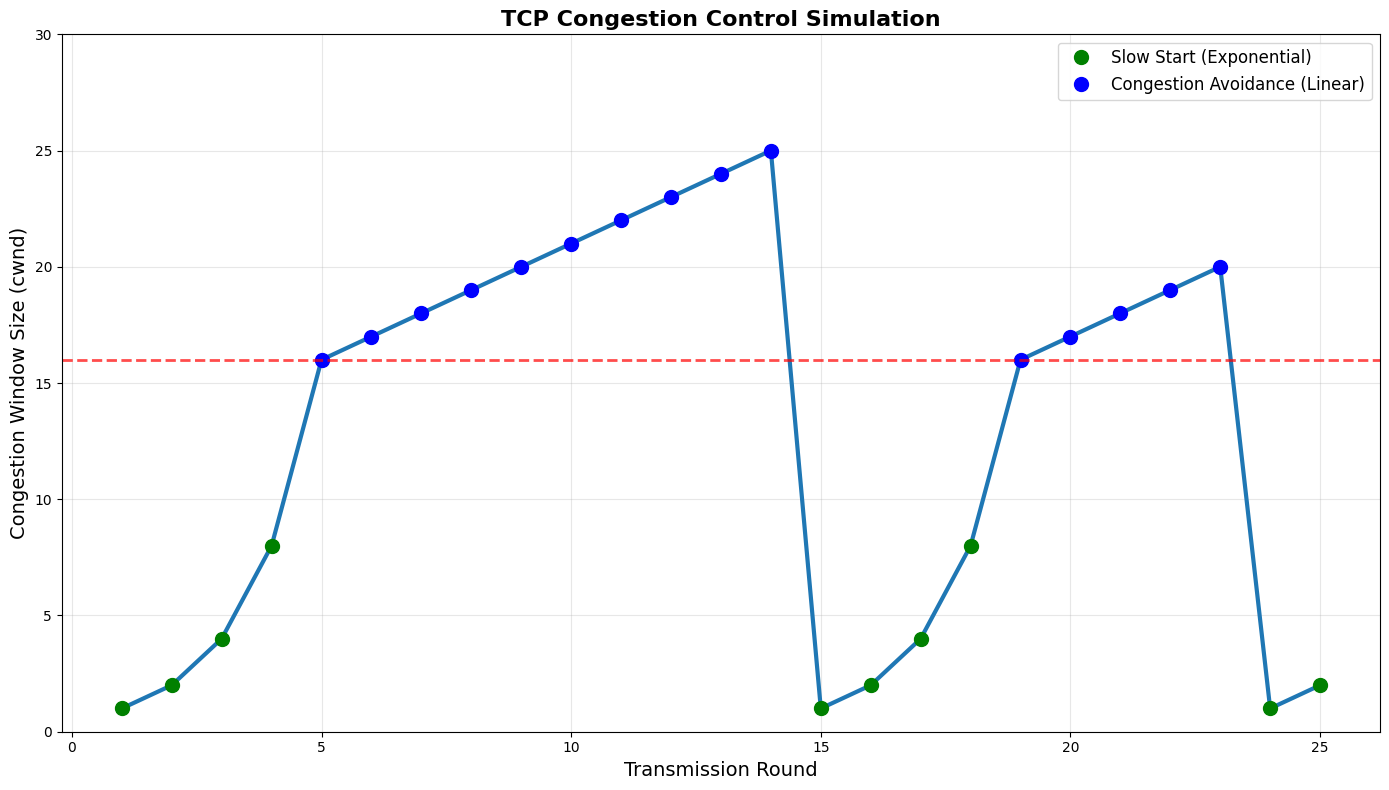


Simulation Summary:
Total rounds: 25
Final cwnd: 2
Exponential growth clearly visible in early rounds


In [11]:
import matplotlib.pyplot as plt
import random

random.seed(10)

rounds = 25
ssthresh = 16
cwnd = 1
loss_prob = 0.15
cwnd_history = []
phases = []

for i in range(rounds):
    cwnd_history.append(cwnd)
    if cwnd < ssthresh:
        phase = "Slow Start"
    else:
        phase = "Congestion Avoidance"
    phases.append(phase)
    print(f"Round {i+1}: cwnd = {cwnd}, ssthresh = {ssthresh}, Phase = {phase}")
    
    if random.random() < loss_prob:
        print("  → Packet loss detected! Multiplicative decrease.")
        ssthresh = max(cwnd // 2, 1)
        cwnd = 1
        print(f"  → New ssthresh = {ssthresh}, cwnd reset to 1")
        continue
    
    if cwnd < ssthresh:
        cwnd *= 2
        print(f"  → Slow Start: cwnd doubled to {cwnd}")
    else:
        cwnd += 1
        print(f"  → Congestion Avoidance: cwnd increased to {cwnd}")

plt.figure(figsize=(14, 8))
plt.plot(range(1, rounds + 1), cwnd_history, marker='o', linewidth=3, markersize=8)
plt.title("TCP Congestion Control Simulation", fontsize=16, fontweight='bold')
plt.xlabel("Transmission Round", fontsize=14)
plt.ylabel("Congestion Window Size (cwnd)", fontsize=14)
plt.grid(True, alpha=0.3)

slow_start_color = 'green'
congestion_avoidance_color = 'blue'
for i in range(len(phases)):
    if phases[i] == "Slow Start":
        plt.plot(i+1, cwnd_history[i], 'o', color=slow_start_color, markersize=10)
    else:
        plt.plot(i+1, cwnd_history[i], 'o', color=congestion_avoidance_color, markersize=10)

plt.plot([], [], 'o', color=slow_start_color, label='Slow Start (Exponential)', markersize=10)
plt.plot([], [], 'o', color=congestion_avoidance_color, label='Congestion Avoidance (Linear)', markersize=10)
plt.legend(fontsize=12)
plt.axhline(y=16, color='red', linestyle='--', alpha=0.7, linewidth=2)
plt.ylim(0, max(cwnd_history) + 5)
plt.tight_layout()
plt.savefig("cwnd_plot.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"\nSimulation Summary:")
print(f"Total rounds: {rounds}")
print(f"Final cwnd: {cwnd_history[-1]}")
print(f"Exponential growth clearly visible in early rounds")